In [2]:
#!pip install nltk
import nltk
import pandas as pd
import geopandas as gpd
from IPython.display import Markdown, display
import shapefile
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import pyLDAvis.gensim_models
import numpy as np
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import pos_tag
from nltk.classify import NaiveBayesClassifier
import matplotlib.font_manager as fm
import gensim
from gensim import corpora, models
from collections import Counter
import seaborn as sns


#font_path = 'C:\\Users\\paton\\Documents\\_Glasgow Univ MSc\\_yr2_dissertation\\python\\Open_Sans\\OpenSans-VariableFont_wdth,wght.ttf'
#fm.fontManager.addfont(font_path)

C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\envs\my37env\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## Read in data for Planning Applications with subset option

In [3]:
#read in planning app data
subset_size = 5000  # Specify the size of the random subset you want
planapp_gdf_read = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\Planning_Applications_CCF_PREMIUM_-_Scotland-sh_plnapp_premium pub_plnapppol\\pub_plnapppol.shp')
planapp_gdf = planapp_gdf_read.sample(n=subset_size)


## Read in data for LDPs

In [4]:
#read in LDP data
#planldp_gdf = gpd.read_file('D:\\_Glasgow Univ MSc\\_dissertation_data\\other\\AttributeRemover_3_Output_area.shp')

## Define columns for Description, Application, Status, Proposal and for LDPs for Type and Text of Type

In [5]:
#create columns for later handling
planapp_gdf["text_proposal"] = planapp_gdf["proposal"]
planapp_gdf["text_desc"] = planapp_gdf["dev_desc"]
planapp_gdf["text_app"] = planapp_gdf["appl_desc"]
planapp_gdf["text_status"] = planapp_gdf["stat_desc"]
#planldp_gdf["text_type1"] = planldp_gdf["type"]
#planldp_gdf["text_type2"] = planldp_gdf["text_type1"]


## Text preprocessing function

In [6]:
def text_preprocessing(text):
    if text is None:
        return []  # Return an empty list if text is None
    # Convert words to lower case
    text = text.lower()
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    return text

def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Single version for processing selected columns, singly or in parallel

## 1. Select the column for processing (code into drop down?)

In [7]:
#planapp_gdf["text_desc"] 
#planapp_gdf["text_app"] 
#planapp_gdf["text_status"] 
#planapp_gdf["text_proposal"]

planapp_gdf["feature"] = planapp_gdf["text_app"]
planapp_gdf["feature_unsplit"] = planapp_gdf["text_app"]

## 2. Word Clouds
## 3. Apply text preprocessing function to Description

In [8]:
# Create a list of review by applying text_preprocessing function
planapp_gdf["feature"] = list(map(text_preprocessing, planapp_gdf.feature))

# Return to string with to_string function
planapp_gdf['feature_clean'] = list(map(to_string, planapp_gdf["feature"]))

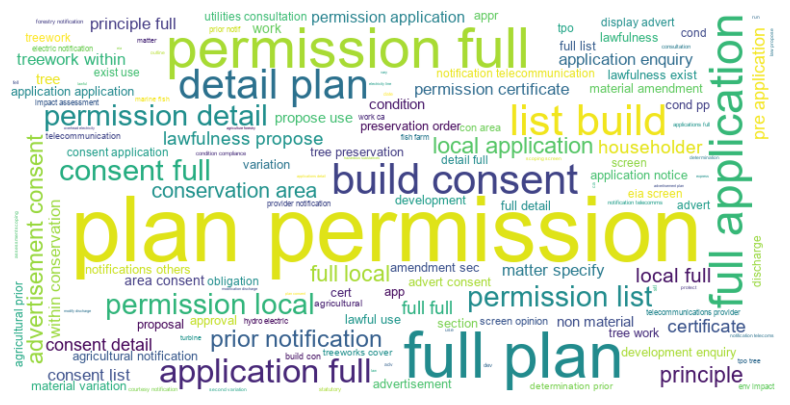

In [9]:
# further word cloud needed for tokenised text
text_app_series = planapp_gdf["feature_clean"]
data = ' '.join(text_app_series.astype(str))
font_path = 'C:\\Windows\\Fonts\\arial.ttf'  # Specify the TrueType font file
wordcloud = WordCloud(font_path=font_path,background_color='white',width=800,height=400).generate(data)
# Display the generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Term count and chart of phrases and tokens (selectable count threshold below for "most_frequent")



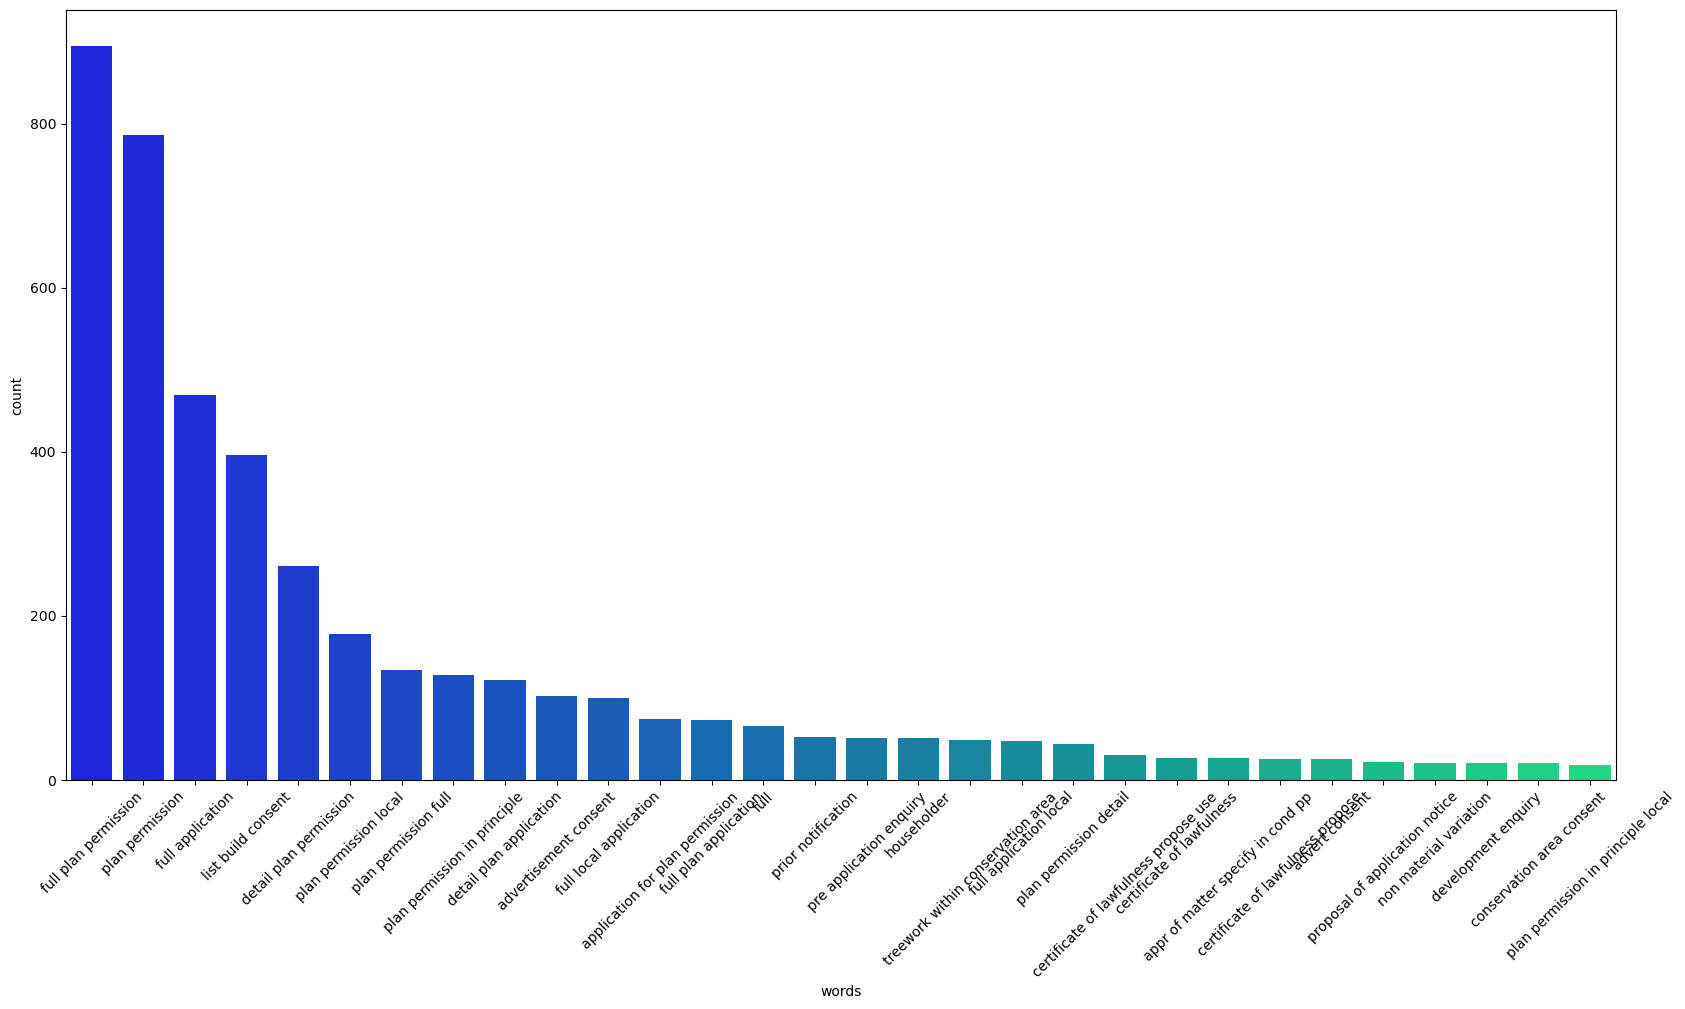

Counter({'full plan permission': 894, 'plan permission': 786, 'full application': 469, 'list build consent': 396, 'detail plan permission': 261, 'plan permission local': 178, 'plan permission full': 134, 'plan permission in principle': 128, 'detail plan application': 122, 'advertisement consent': 102, 'full local application': 100, 'application for plan permission': 74, 'full plan application': 73, 'full': 66, 'prior notification': 52, 'pre application enquiry': 51, 'householder': 51, 'treework within conservation area': 49, 'full application local': 47, 'plan permission detail': 44, 'certificate of lawfulness propose use': 30, 'certificate of lawfulness': 26, 'appr of matter specify in cond pp': 26, 'certificate of lawfulness propose': 25, 'advert consent': 25, 'proposal of application notice': 22, 'non material variation': 21, 'development enquiry': 20, 'conservation area consent': 20, 'plan permission in principle local': 18, 'householder plan permission': 18, 'prior notifications o

In [10]:
#phrases
word_counter = Counter(planapp_gdf["feature_clean"])
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

plt.show()

print(word_counter)

Counter({'plan': 2771, 'permission': 2557, 'full': 1784, 'application': 1072, 'consent': 618, 'list': 443, 'build': 442, 'detail': 432, 'local': 343, 'in': 236, 'of': 232, 'principle': 153, 'notification': 150, 'advertisement': 132, 'prior': 128, 'for': 122, 'certificate': 122, 'lawfulness': 112, 'area': 98, 'conservation': 94, 'tree': 79, 'propose': 78, 'enquiry': 73, 'householder': 72, 'use': 70, 'treework': 61, 'pre': 59, 'matter': 57, 'work': 56, 'to': 53, 'specify': 53, 'advert': 51, 'within': 49, 'variation': 49, 'development': 44, 'screen': 40, 'non': 39, 'material': 39, 'condition': 39, 'agricultural': 38, 'cond': 29, 'appr': 26, 'pp': 26, 'section': 24, 'exist': 23, 'proposal': 22, 'notice': 22, 'amendment': 22, 'app': 22, 'lawful': 22, 'approval': 21, 'consultation': 19, 'telecommunications': 18, 'tpo': 18, 'notifications': 17, 'others': 17, 'cert': 17, 'preservation': 17, 'order': 17, 'sec': 17, '64': 17, 'discharge': 17, 'eia': 16, 'or': 15, 'applications': 15, 'utilities':

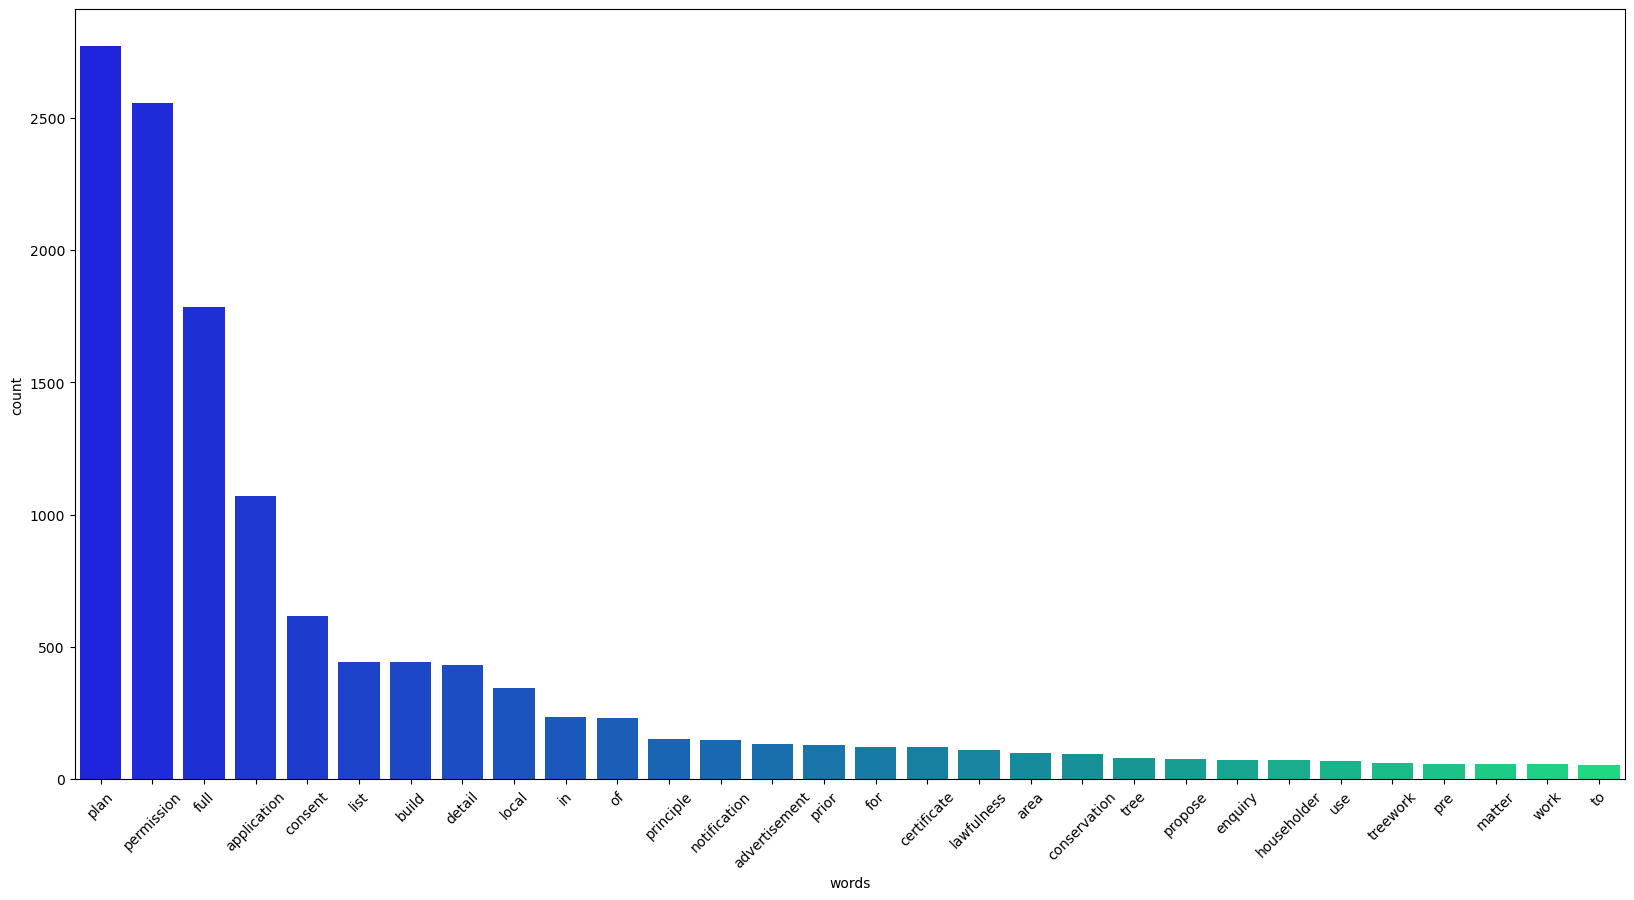

In [11]:
# token words
# Join all word corpus
desc_words = ' '.join(list(planapp_gdf['feature_clean'].values))

# Count and find the 30 most frequent
word_counter = Counter(desc_words.split())
most_frequent = word_counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize=(20, 10))
_ = pd.DataFrame(most_frequent, columns=("words", "count"))
sns.barplot(x='words', y='count', data=_, palette='winter')
plt.xticks(rotation=45)

print(word_counter)

## 4a. Tokenisation and LDM modelling with coherence score plot - Phrases

In [12]:
#desc_list = [desc.split() for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]


In [13]:
desc_list

[['full plan permission'],
 ['full application'],
 ['prior notifications others'],
 ['pre application enquiry'],
 ['utilities consultation'],
 ['list build consent'],
 ['treework within conservation area'],
 ['list build consent'],
 ['detail plan application'],
 ['list build consent'],
 ['detail plan permission'],
 ['plan permission'],
 ['plan permission local'],
 ['plan permission'],
 ['list build consent'],
 ['full application'],
 ['detail plan permission'],
 ['detail plan permission'],
 ['full local application'],
 ['prior notification'],
 ['plan permission'],
 ['plan permission'],
 ['plan permission'],
 ['full local application'],
 ['list build consent'],
 ['plan permission'],
 ['application for plan permission'],
 ['work to tree'],
 ['full plan permission'],
 ['agricultural prior notification'],
 ['full plan permission'],
 ['cert of law propose use or development'],
 ['full plan permission'],
 ['plan permission local'],
 ['application for plan permission'],
 ['detail plan permissi

In [14]:
# Version for the phrases not the single words

# Filter out non-string values
# Filter out non-string values
desc_list = [[desc] for desc in planapp_gdf["feature_clean"] if isinstance(desc, str)]

# Create Dictionary
id2word = gensim.corpora.Dictionary(desc_list)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in desc_list]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []

for i in range(1, 5): #change back to 20
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=desc_list,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -24.46305163830467
Iteration 2: Coherence Score = -24.454674432528115
Iteration 3: Coherence Score = -24.395055816699113
Iteration 4: Coherence Score = -24.17341278426679


In [15]:
desc_list

[['full plan permission'],
 ['full application'],
 ['prior notifications others'],
 ['pre application enquiry'],
 ['utilities consultation'],
 ['list build consent'],
 ['treework within conservation area'],
 ['list build consent'],
 ['detail plan application'],
 ['list build consent'],
 ['detail plan permission'],
 ['plan permission'],
 ['plan permission local'],
 ['plan permission'],
 ['list build consent'],
 ['full application'],
 ['detail plan permission'],
 ['detail plan permission'],
 ['full local application'],
 ['prior notification'],
 ['plan permission'],
 ['plan permission'],
 ['plan permission'],
 ['full local application'],
 ['list build consent'],
 ['plan permission'],
 ['application for plan permission'],
 ['work to tree'],
 ['full plan permission'],
 ['agricultural prior notification'],
 ['full plan permission'],
 ['cert of law propose use or development'],
 ['full plan permission'],
 ['plan permission local'],
 ['application for plan permission'],
 ['detail plan permissi

   ## Coherence lineplot of phrases

<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

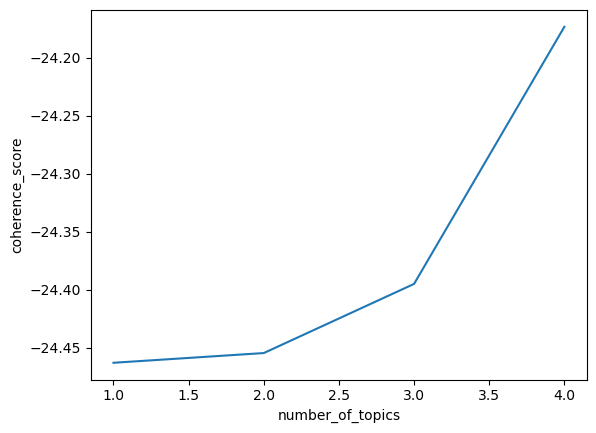

In [16]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [17]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [18]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.005*"plan permission" + 0.005*"detail plan permission" + 0.005*"plan permission in principle" + 0.005*"application for plan permission" + 0.005*"plan permission local" + 0.005*"plan permission full" + 0.005*"advertisement consent" + 0.005*"plan permission detail" + 0.005*"full local application" + 0.005*"full plan application"
Topic: 1 Word: 0.005*"plan permission" + 0.005*"detail plan permission" + 0.005*"plan permission in principle" + 0.005*"application for plan permission" + 0.005*"plan permission local" + 0.005*"plan permission full" + 0.005*"advertisement consent" + 0.005*"plan permission detail" + 0.005*"full local application" + 0.005*"full plan application"
Topic: 2 Word: 0.005*"plan permission" + 0.005*"detail plan permission" + 0.005*"plan permission in principle" + 0.005*"application for plan permission" + 0.005*"plan permission local" + 0.005*"plan permission full" + 0.005*"advertisement consent" + 0.005*"plan permission detail" + 0.005*"full local applica

## Visualisation of phrases by topic

In [19]:
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)


## 4b. Tokenisation of phrases to create words 

In [20]:
# Tokenize the documents
tokenized_docs = [word_tokenize(doc) for doc in planapp_gdf["feature_clean"].tolist()]

# Create Dictionary
id2word = gensim.corpora.Dictionary(tokenized_docs)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_docs]

from gensim.models import CoherenceModel, LdaMulticore

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1, 20):
    lda_model = LdaMulticore(corpus=corpus,
                             id2word=id2word,
                             iterations=5,
                             num_topics=i,
                             workers=8)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=tokenized_docs,
                                         dictionary=id2word,
                                         coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

    # Print coherence score for each iteration
    print(f"Iteration {i}: Coherence Score = {coherence_lda}")


Iteration 1: Coherence Score = -18.680999745299495
Iteration 2: Coherence Score = -18.6838916294991
Iteration 3: Coherence Score = -19.070849920101512
Iteration 4: Coherence Score = -18.379396038451187
Iteration 5: Coherence Score = -18.441838224336202
Iteration 6: Coherence Score = -18.563493991902632
Iteration 7: Coherence Score = -18.48327714809523
Iteration 8: Coherence Score = -18.928933464657838
Iteration 9: Coherence Score = -18.75337954722185
Iteration 10: Coherence Score = -18.899002830113137
Iteration 11: Coherence Score = -18.390634466833642
Iteration 12: Coherence Score = -18.684527995948
Iteration 13: Coherence Score = -18.483057429901912
Iteration 14: Coherence Score = -18.84553235685051
Iteration 15: Coherence Score = -18.548996619763823
Iteration 16: Coherence Score = -18.739125971542
Iteration 17: Coherence Score = -18.746984206503697
Iteration 18: Coherence Score = -18.616629250524664
Iteration 19: Coherence Score = -18.55978821127196


<AxesSubplot:xlabel='number_of_topics', ylabel='coherence_score'>

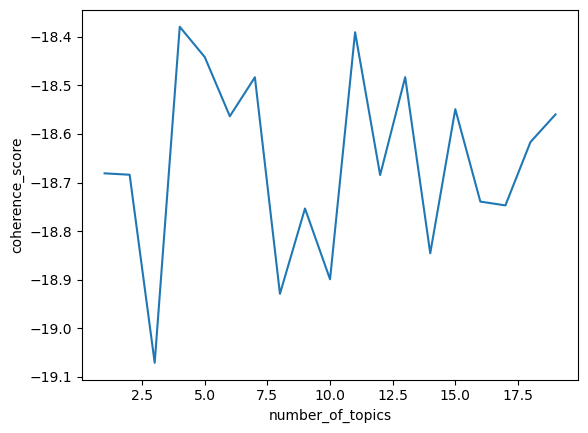

In [21]:
topic_coherence = pd.DataFrame({'number_of_topics': number_of_topics,
                                'coherence_score': coherence_score})
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [22]:
corpus 

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1)],
 [(3, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(14, 1), (15, 1), (16, 1), (17, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(2, 1), (3, 1), (18, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(1, 1), (2, 1), (18, 1)],
 [(1, 1), (2, 1)],
 [(1, 1), (2, 1), (19, 1)],
 [(1, 1), (2, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(0, 1), (3, 1)],
 [(1, 1), (2, 1), (18, 1)],
 [(1, 1), (2, 1), (18, 1)],
 [(0, 1), (3, 1), (19, 1)],
 [(6, 1), (20, 1)],
 [(1, 1), (2, 1)],
 [(1, 1), (2, 1)],
 [(1, 1), (2, 1)],
 [(0, 1), (3, 1), (19, 1)],
 [(11, 1), (12, 1), (13, 1)],
 [(1, 1), (2, 1)],
 [(1, 1), (2, 1), (3, 1), (21, 1)],
 [(22, 1), (23, 1), (24, 1)],
 [(0, 1), (1, 1), (2, 1)],
 [(6, 1), (20, 1), (25, 1)],
 [(0, 1), (1, 1), (2, 1)],
 [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(0, 1), (1, 1), (2, 1)],
 [(1, 1), (2, 1), (19, 1)],
 [(1, 1), (2, 1), (3, 1), (21, 1)],
 [(1, 1), (2, 1), (18, 1)],
 [(0, 1)

   ### Modelling of words running with defined number of topics

In [23]:
# Define the number of topics 
n_topics = 17

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [24]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.005*"householder" + 0.005*"screen" + 0.005*"variation" + 0.005*"second" + 0.005*"impact" + 0.005*"assessment" + 0.005*"scoping" + 0.005*"env" + 0.005*"further" + 0.005*"applications"
Topic: 1 Word: 0.005*"householder" + 0.005*"screen" + 0.005*"variation" + 0.005*"second" + 0.005*"impact" + 0.005*"assessment" + 0.005*"scoping" + 0.005*"env" + 0.005*"further" + 0.005*"applications"
Topic: 2 Word: 0.005*"householder" + 0.005*"screen" + 0.005*"variation" + 0.005*"second" + 0.005*"impact" + 0.005*"assessment" + 0.005*"scoping" + 0.005*"env" + 0.005*"further" + 0.005*"applications"
Topic: 3 Word: 0.469*"notification" + 0.277*"prior" + 0.103*"agricultural" + 0.074*"determination" + 0.028*"telecommunications" + 0.006*"notifications" + 0.006*"others" + 0.000*"telecommunication" + 0.000*"forestry" + 0.000*"agriculture"
Topic: 4 Word: 0.005*"householder" + 0.005*"screen" + 0.005*"variation" + 0.005*"second" + 0.005*"impact" + 0.005*"assessment" + 0.005*"scoping" + 0.005*"env" + 0

## 7. Visualisation using pyLDAvis

In [25]:
import pyLDAvis.gensim_models
import numpy as np
import pandas as pd

# Enable notebook display
pyLDAvis.enable_notebook()

# Prepare the visualization data
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)

# Convert topic_info to a DataFrame
topic_info_df = pd.DataFrame(vis_data.topic_info)

# Convert token_table to a DataFrame
token_table_df = pd.DataFrame(vis_data.token_table)

# Convert topic_coordinates to a DataFrame and replace complex numbers with real values
topic_coords_df = pd.DataFrame(vis_data.topic_coordinates.applymap(np.real))

# Convert any remaining NaN values to 0
topic_coords_df = topic_coords_df.fillna(0)

# Create a new PreparedData object with the updated data
updated_data = pyLDAvis.PreparedData(topic_coordinates=topic_coords_df,
                                    topic_info=topic_info_df,
                                    token_table=token_table_df,
                                    R=vis_data.R,
                                    lambda_step=vis_data.lambda_step,
                                    plot_opts=vis_data.plot_opts,
                                    topic_order=vis_data.topic_order)

# Display the visualization
pyLDAvis.display(updated_data)
